In [53]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split
 
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
print('TensoFlow Version: ', tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16

#from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

TensoFlow Version:  2.10.0


In [54]:
wrkdir = os.getcwd()
print(wrkdir)

/Users/kanishkhajaisankar/Downloads/Projects/Self_driving_car/Traffic_Sign_Detection


In [63]:
path = '/Users/kanishkhajaisankar/Downloads/Projects/Self_driving_car/Traffic_Sign_Detection'
lab = pd.read_csv('/Users/kanishkhajaisankar/Downloads/Projects/Self_driving_car/Traffic_Sign_Detection/labels.csv')
lab.head()

,ClassId,Name
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [ ]:
d = dict()
class_labels = dict()
for dirs in os.listdir('/Users/kanishkhajaisankar/Downloads/Projects/Self_driving_car/Traffic_Sign_Detection/myData'):
    count = len(os.listdir('/Users/kanishkhajaisankar/Downloads/Projects/Self_driving_car/Traffic_Sign_Detection/myData/'+dirs))
    d[dirs+' => '+lab[lab.ClassId == int(dirs)].values[0][1]] = count
    class_labels[int(dirs)] = lab[lab.ClassId == int(dirs)].values[0][1]

plt.figure(figsize = (20, 50))
sns.barplot(y = list(d.keys()), x = list(d.values()), palette = 'Set3')


In [65]:
img_rows, img_cols = 32, 32
img_channels = 3
nb_classes = len(class_labels.keys())

datagen = ImageDataGenerator()
data = datagen.flow_from_directory('/Users/kanishkhajaisankar/Downloads/Projects/Self_driving_car/Traffic_Sign_Detection/myData',
                                    target_size=(32, 32),
                                    batch_size=32,
                                    class_mode='categorical',
                                    shuffle=True )

Found 73139 images belonging to 43 classes.


Data Shape   :(32, 32, 32, 3)
Labels shape :(32, 43)


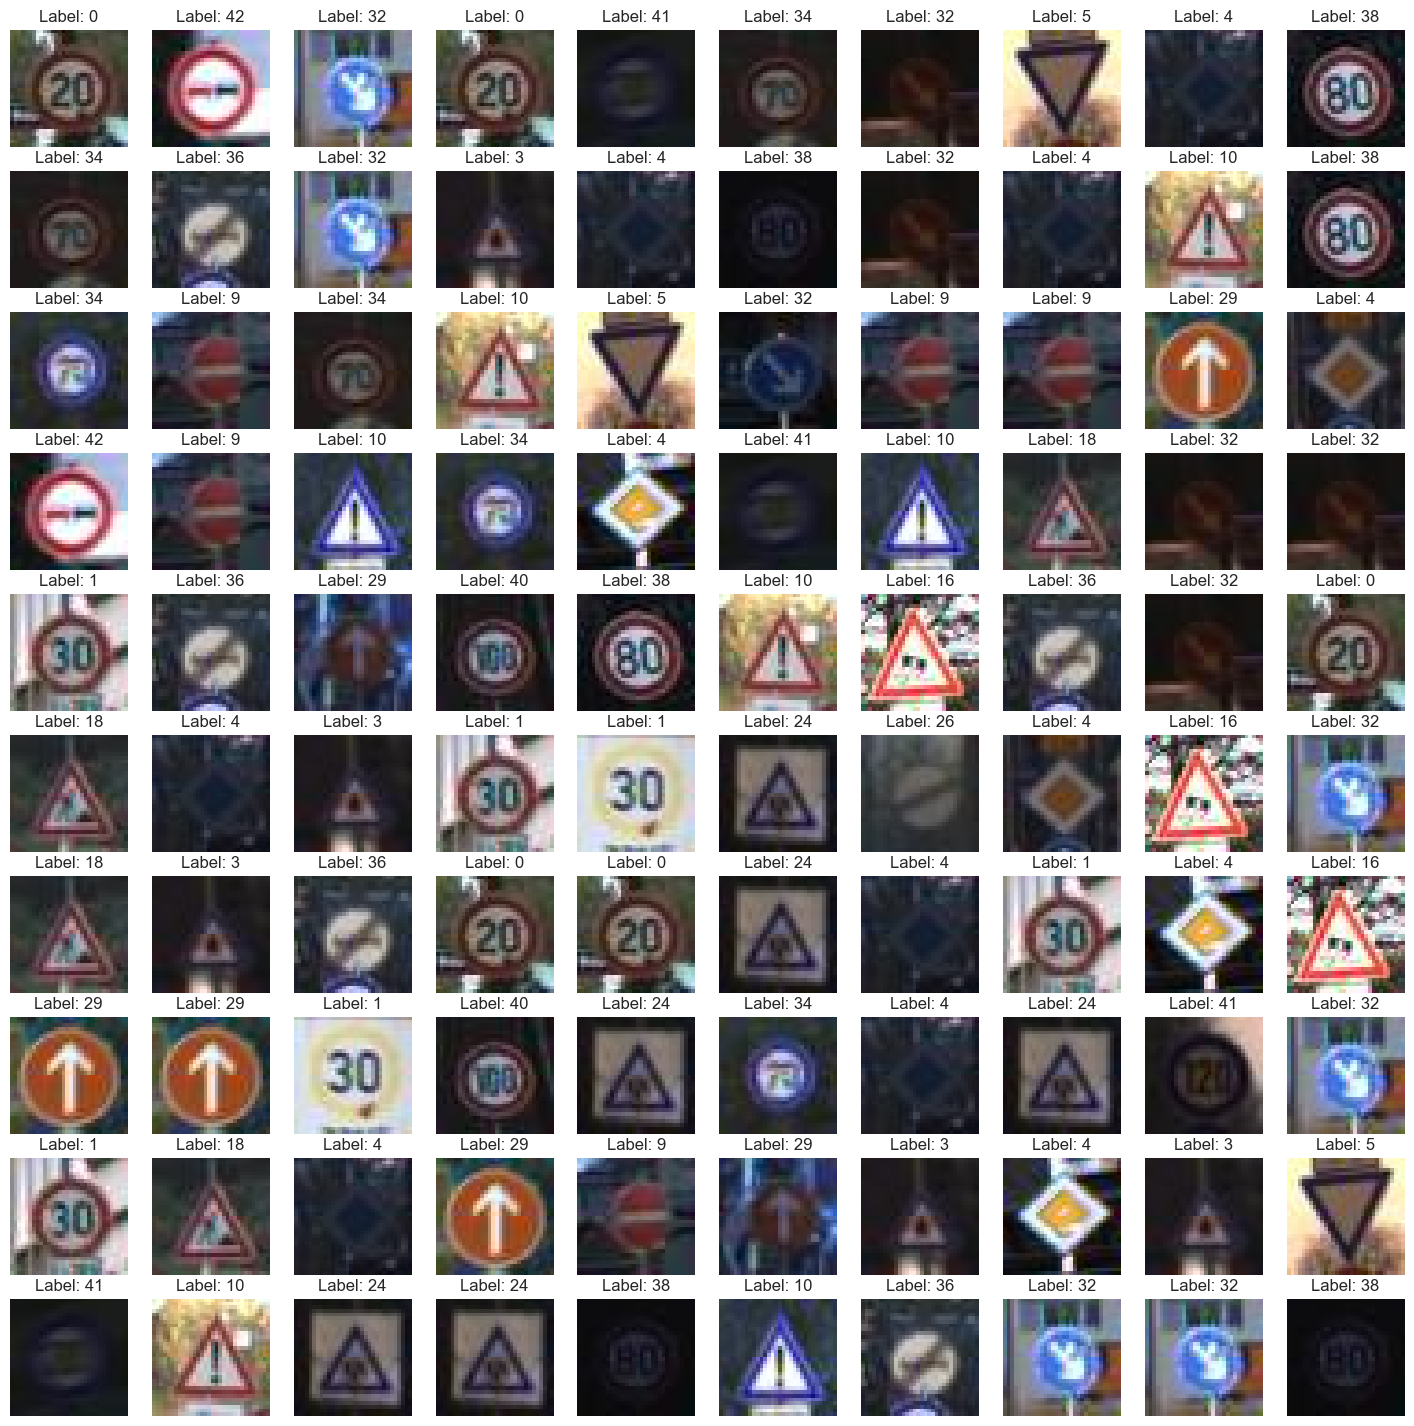

In [66]:
X , y = data.next()
print(f"Data Shape   :{X.shape}\nLabels shape :{y.shape}")

fig, axes = plt.subplots(10,10, figsize=(18,18))
for i,ax in enumerate(axes.flat):
    r = np.random.randint(X.shape[0])
    ax.imshow(X[r].astype('uint8'))
    ax.grid(False)
    ax.axis('off')
    ax.set_title('Label: '+str(np.argmax(y[r])))

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)
print("Train Shape: {}\nTest Shape : {}".format(X_train.shape, X_test.shape))
resnet = ResNet50(weights= None, include_top=False, input_shape= (img_rows,img_cols,img_channels))
x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(nb_classes, activation= 'softmax')(x)
model = Model(inputs = resnet.input, outputs = predictions)



Train Shape: (25, 32, 32, 3)
Test Shape : (7, 32, 32, 3)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)
print("Train Shape: {}\nTest Shape : {}".format(X_train.shape, X_test.shape))
resnet = ResNet50(weights= 'imagenet', include_top=False, input_shape= (32,32,3))
x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Flatten(x)
predictions = Dense(nb_classes, activation= 'softmax')(x)
model = Model(inputs = resnet.input, outputs = predictions)

In [ ]:
model.summary()
plot_model(model, show_layer_names=True, show_shapes =True, to_file='model.png', dpi=350)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                            

In [ ]:
n_epochs = 25
history =  model.fit(X_train, y_train,  batch_size = 32, epochs = n_epochs, verbose = 1, 
              validation_data = (X_test, y_test), callbacks = [model_check, early, reduce_lr, csv_logger])



Epoch 1/25
1829/1829 [==============================] - ETA: 0s - loss: 2.8752 - accuracy: 0.3823

2022-10-07 03:54:42.484345: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1829/1829 [==============================] - 213s 115ms/step - loss: 2.8752 - accuracy: 0.3823 - val_loss: 2.5455 - val_accuracy: 0.4558 - lr: 0.0010
Epoch 2/25
1829/1829 [==============================] - 209s 114ms/step - loss: 1.8191 - accuracy: 0.5613 - val_loss: 0.8948 - val_accuracy: 0.7032 - lr: 0.0010
Epoch 3/25
1829/1829 [==============================] - 190s 104ms/step - loss: 1.0565 - accuracy: 0.7121 - val_loss: 0.8302 - val_accuracy: 0.7313 - lr: 0.0010
Epoch 4/25
1829/1829 [==============================] - 187s 102ms/step - loss: 0.5190 - accuracy: 0.8559 - val_loss: 0.1716 - val_accuracy: 0.9491 - lr: 0.0010
Epoch 5/25
1829/1829 [==============================] - 203s 111ms/step - loss: 0.3879 - accuracy: 0.8948 - val_loss: 0.1490 - val_accuracy: 0.9534 - lr: 0.0010
Epoch 6/25
1829/1829 [==============================] - 186s 102ms/step - loss: 0.2151 - accuracy: 0.9394 - val_loss: 2.4338 - val_accuracy: 0.6712 - lr: 0.0010
Epoch 7/25
1829/1829 [=======================

In [ ]:
# Saving the model
model.save('TSC_model.h5')

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print('Accuracy: ', acc, '\nLoss    : ', loss)

458/458 [==============================] - 16s 33ms/step - loss: 0.0157 - accuracy: 0.9956
Accuracy:  0.9955564737319946 
Loss    :  0.015725942328572273


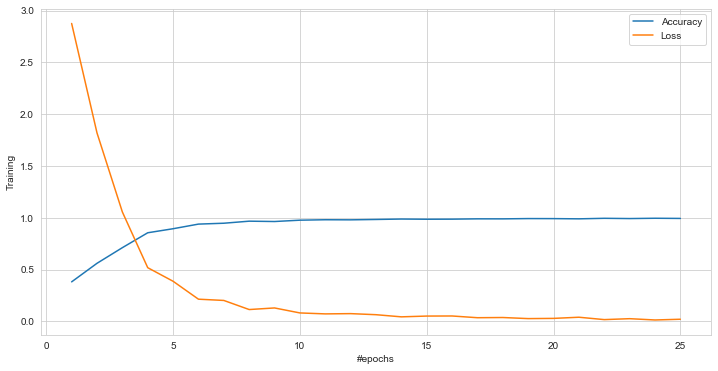

In [ ]:
q = len(list(history.history['loss']))
plt.figure(figsize=(12, 6))
sns.lineplot(x = range(1, 1+q), y = history.history['accuracy'], label = 'Accuracy')
sns.lineplot(x = range(1, 1+q), y = history.history['loss'], label = 'Loss')
plt.xlabel('#epochs')
plt.ylabel('Training')
plt.legend();

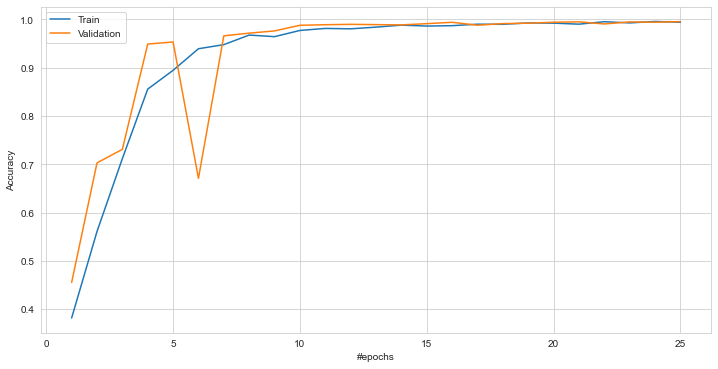

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x = range(1, 1+q), y = history.history['accuracy'], label = 'Train')
sns.lineplot(x = range(1, 1+q), y = history.history['val_accuracy'], label = 'Validation')
plt.xlabel('#epochs')
plt.ylabel('Accuracy')
plt.legend();

In [ ]:

pred = np.argmax(model.predict(X_test), axis = 1)

458/458 [==============================] - 13s 27ms/step


In [ ]:
labels = [class_labels[i] for i in range(43)]
print(classification_report(np.argmax(y_test, axis = 1), pred, target_names = labels))

                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       1.00      1.00      1.00        89
                              Speed limit (30km/h)       1.00      0.99      0.99      1018
                              Speed limit (50km/h)       1.00      1.00      1.00       742
                              Speed limit (60km/h)       1.00      1.00      1.00       498
                              Speed limit (70km/h)       1.00      1.00      1.00       801
                              Speed limit (80km/h)       1.00      1.00      1.00       811
                       End of speed limit (80km/h)       1.00      1.00      1.00       297
                             Speed limit (100km/h)       1.00      1.00      1.00       241
                             Speed limit (120km/h)       1.00      0.99      1.00       154
                                        No passing       1.00      1.00      1.

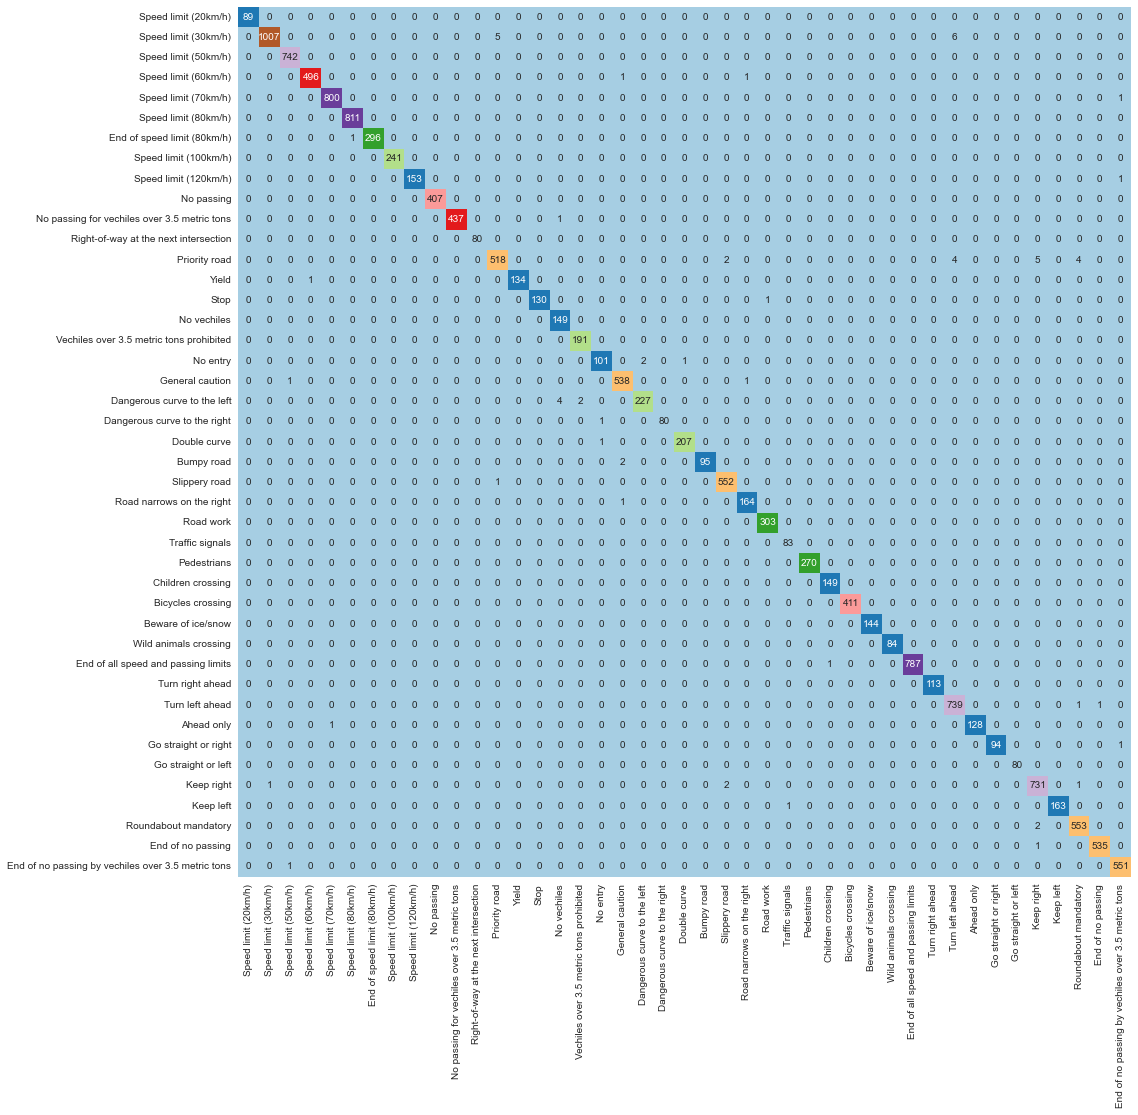

In [ ]:
cmat = confusion_matrix(np.argmax(y_test, axis=1), pred)
plt.figure(figsize=(16,16))
sns.heatmap(cmat, annot = True, cbar = False, cmap='Paired', fmt="d", xticklabels=labels, yticklabels=labels);

In [ ]:
classwise_acc = cmat.diagonal()/cmat.sum(axis=1) * 100 
cls_acc = pd.DataFrame({'Class_Label':[class_labels[i] for i in range(43)], 'Accuracy': classwise_acc.tolist()}, columns = ['Class_Label', 'Accuracy'])
cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='green')

/var/folders/01/h0l2kyp532j4z9fc00pqx8340000gn/T/ipykernel_2884/1574839337.py:3: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='green')


Class_Label,Accuracy
Speed limit (20km/h),100.00
Speed limit (30km/h),98.92
Speed limit (50km/h),100.00
Speed limit (60km/h),99.60
Speed limit (70km/h),99.88
Speed limit (80km/h),100.00
End of speed limit (80km/h),99.66
Speed limit (100km/h),100.00
Speed limit (120km/h),99.35
No passing,100.00


1/1 [==============================] - 0s 22ms/step


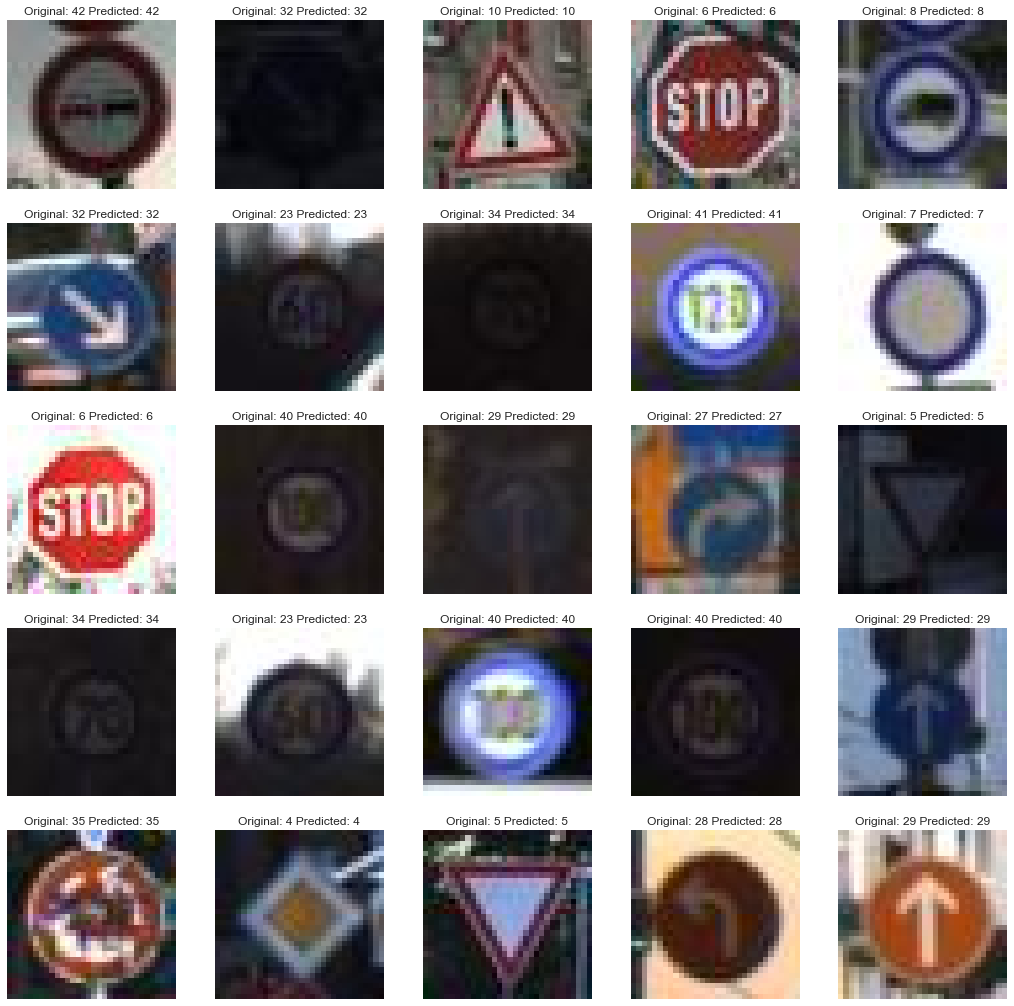

In [ ]:
fig, axes = plt.subplots(5,5, figsize=(18,18))
for i,ax in enumerate(axes.flat):
    r = np.random.randint(X_test.shape[0])
    ax.imshow(X_test[r].astype('uint8'))
    ax.grid(False)
    ax.axis('off')
    ax.set_title('Original: {} Predicted: {}'.format(np.argmax(y_test[r]), np.argmax(model.predict(X_test[r].reshape(1, 32, 32, 3)))))

Using VGG16

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)
print("Train Shape: {}\nTest Shape : {}".format(X_train.shape, X_test.shape))
vgg16 = VGG16(weights= 'imagenet', include_top=False, input_shape= (32,32,3))
x = vgg16.output
x = GlobalAveragePooling2D()(x)
#x = Flatten(x)
predictions = Dense(nb_classes, activation= 'softmax')(x)
model = Model(inputs = vgg16.input, outputs = predictions)

Train Shape: (25, 32, 32, 3)
Test Shape : (7, 32, 32, 3)


In [ ]:
model.summary()
plot_model(model, show_layer_names=True, show_shapes =True, to_file='model.png', dpi=350)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [ ]:
from keras import optimizers

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [ ]:
n_epochs = 25
history =  model.fit(X_train, y_train,  batch_size = 32, epochs = n_epochs, verbose = 1, 
              validation_data = (X_test, y_test))


In [58]:
from tensorflow.keras.applications.mobilenet import MobileNet
CNN_base_mobilenet = MobileNet(input_shape = X.shape[1:], include_top = False, weights = 'imagenet')

In [59]:
for layer in CNN_base_mobilenet.layers:
    layer.trainable = False

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D, SpatialDropout2D
from tensorflow.keras import layers

CNN_mobilenet = Sequential()
CNN_mobilenet.add(BatchNormalization(input_shape = (32, 32, 3)))
CNN_mobilenet.add(CNN_base_mobilenet)
CNN_mobilenet.add(BatchNormalization())
CNN_mobilenet.add(GlobalAveragePooling2D())
CNN_mobilenet.add(Dropout(0.5))
CNN_mobilenet.add(Dense(1, activation = 'sigmoid'))

CNN_mobilenet.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_4 (Batc  (None, 32, 32, 3)        12        
 hNormalization)                                                 
                                                                 
 mobilenet_1.00_224 (Functio  (None, 2, 2, 1024)       3228864   
 nal)                                                            
                                                                 
 batch_normalization_5 (Batc  (None, 1, 1, 1024)       4096      
 hNormalization)                                                 
                                                                 
 global_average_pooling2d_3   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_3 (Dropout)         (None, 1024)             

In [44]:
import pandas as pd
import numpy as np
import datetime as dt
import os
import os.path
from pathlib import Path
import glob
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D, SpatialDropout2D
from tensorflow.keras import layers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from tensorflow.keras.preprocessing import image
from PIL import Image


In [10]:
!pip install pydot
!pip install graphviz


  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
# Compilation
CNN_mobilenet.compile(optimizer='adam',loss = 'binary_crossentropy', metrics=['accuracy'])

# Start of counting time
start = dt.datetime.now()

# Training and validation
CNN_mobilenet_history = CNN_mobilenet.fit(X_train, y_train,  batch_size = 32, epochs = 25, verbose = 1, 
              validation_data = (X_test, y_test))
# End of Time Counting
end = dt.datetime.now()
time_CNN_mobilenet = end - start
print ('\nTraining and validation time: ', time_CNN_mobilenet)

In [11]:
plot_model(CNN_mobilenet, show_layer_names = True , show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
